<img 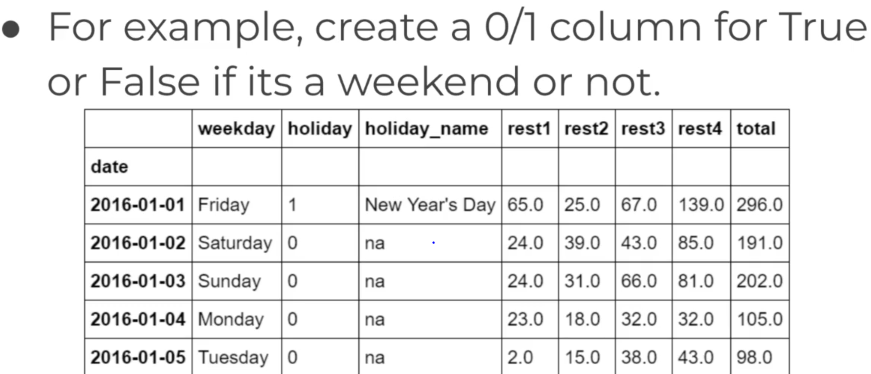

we should have some intution about what relates to the column you are trying to forecast

for statsmodel, exogenous variables should be converted to numerical values.

There are variety of ways to do this.(eg.one hot encoding, dummy variable,etc)

This usually involves just mapping values to some 0 or 1 True or False scale.

This can be done with pandas pd.get_dummies() command

SARIMAX makes it easy to add in additional columns as exogenous variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [3]:
df.index.freq = 'D'

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


so as exogenous model.. we will see whether holiday column will affect the total column

holiday - american holidays
total - no. of visitors in rest1,2,3,4 in america

In [5]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = df.dropna()

In [7]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


In [9]:
## chaning the float dtypes into integer
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
cols = ['rest1','rest2','rest3','rest4','total']

In [11]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int32 
 4   rest2         478 non-null    int32 
 5   rest3         478 non-null    int32 
 6   rest4         478 non-null    int32 
 7   total         478 non-null    int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 24.3+ KB


In [13]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


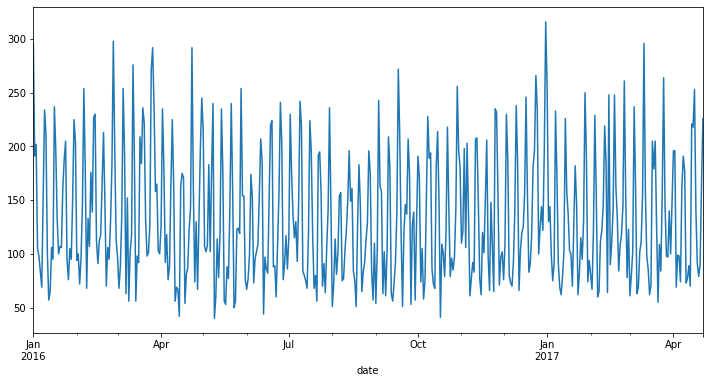

In [14]:
df1['total'].plot(figsize=(12,6))

In [18]:
#This returns the df1 where there is holiday
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [19]:
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

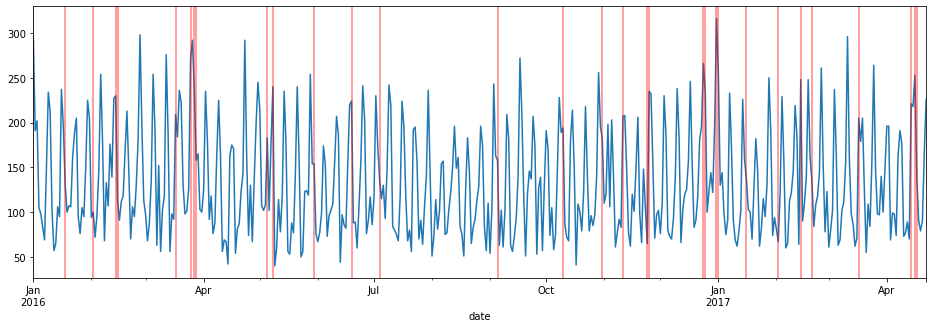

In [33]:
ax = df1['total'].plot(figsize=(16,5))

for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color ='red',alpha=0.5);
    

The red lines are showing the holidays

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose


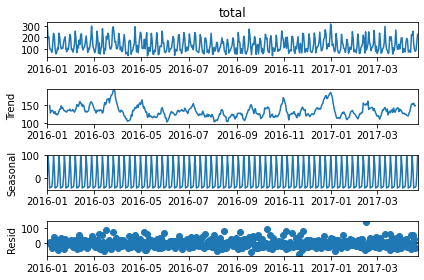

In [36]:
result = seasonal_decompose(df1['total'])
result.plot();

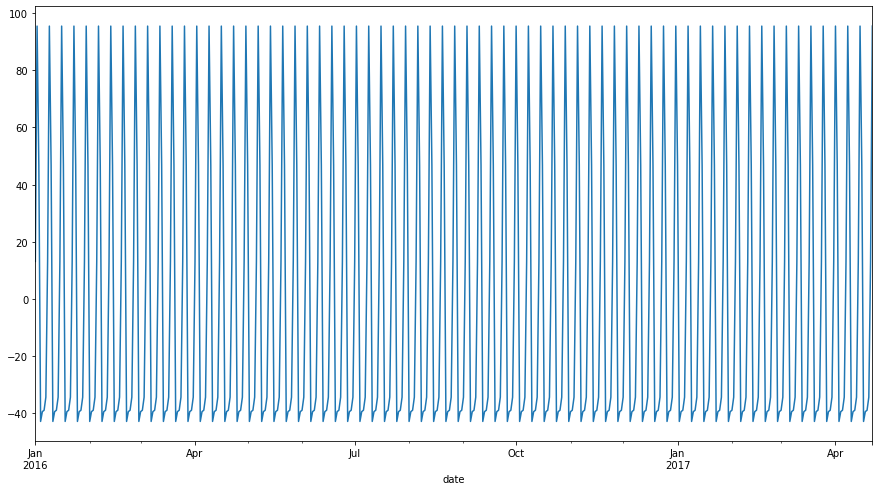

In [38]:
result.seasonal.plot(figsize=(15,8))

In [39]:
len(df1)

478

In [41]:
train = df1.iloc[:436]

In [42]:
test = df1.iloc[436:]

In [43]:
from pmdarima import auto_arima

In [45]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.967
Date:                   Fri, 07 Jan 2022   AIC                           4777.933
Time:                           15:21:59   BIC                           4794.612
Sample:                                0   HQIC                          4784.491
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5185      1.764      3.128      0.002       2.061       8.976
ar.S.L7        0.9599      0.012     77.264      0.000       0.936       0.984
ma.S.L7       -0.6919      0.049    -14.035      0.000      -0.789      -0.595
sigma2      1208.2150     70.338     17.177      0.000    1070.356    1346.074
===================================================================================
Ljung-Box (Q):                       69.75   Jarque-Bera (JB):                51.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.66
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
model = SARIMAX(train['total'],order=(1,0,1),seasonal_order=(2,0,0,7),
               enforce_invertibility=False)

In [49]:
results =  model.fit()

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 7)   Log Likelihood               -2220.130
Date:                            Fri, 07 Jan 2022   AIC                           4450.259
Time:                                    15:26:44   BIC                           4470.647
Sample:                                01-01-2016   HQIC                          4458.305
                                     - 03-11-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7602      0.092      8.279      0.000       0.580       0.940
ma.L1         -0.5629      0.111     -5.053      0.000      -0.781      -0.345
ar.S.L7        0.4895      0.037     13.067      0.000       0.416       0.563
ar.S.L14       0.4548      0.038     12.064      0.000       0.381       0.529
sigma2      1498.1426     82.127     18.242      0.000    1337.177    1659.109
===================================================================================
Ljung-Box (Q):                       79.97   Jarque-Bera (JB):                27.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.34
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
start =len(train)
start

436

In [53]:
end = len(train) +len(test) -1
end

477

In [54]:
predictions = results.predict(start,end).rename('SARIMA Model')

In [55]:
predictions

2017-03-12    167.271516
2017-03-13     79.549149
2017-03-14     99.779934
2017-03-15     85.320231
2017-03-16     96.533055
2017-03-17    126.681378
2017-03-18    256.037946
2017-03-19    159.021320
2017-03-20     69.533718
2017-03-21     81.699149
2017-03-22     89.276907
2017-03-23     98.589436
2017-03-24    133.153842
2017-03-25    260.444825
2017-03-26    154.290659
2017-03-27     70.500879
2017-03-28     85.588632
2017-03-29     82.668983
2017-03-30     92.287554
2017-03-31    122.887947
2017-04-01    244.004878
2017-04-02    147.902661
2017-04-03     66.175619
2017-04-04     79.083716
2017-04-05     81.093615
2017-04-06     90.031389
2017-04-07    120.725741
2017-04-08    237.900687
2017-04-09    142.577331
2017-04-10     64.462733
2017-04-11     77.641689
2017-04-12     77.296399
2017-04-13     86.045093
2017-04-14    114.986243
2017-04-15    227.426440
2017-04-16    137.058417
2017-04-17     61.651832
2017-04-18     73.973248
2017-04-19     74.718239
2017-04-20     83.065464


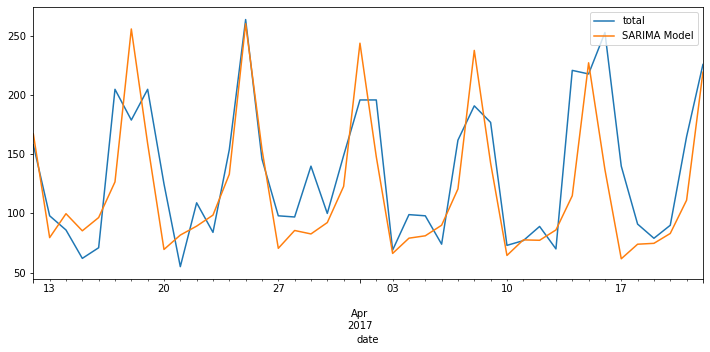

In [56]:
test['total'].plot(legend=True,figsize=(12,5))
predictions.plot(legend= True)

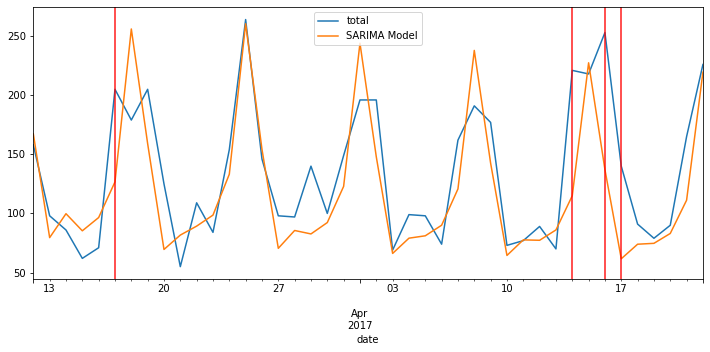

In [58]:
ax = test['total'].plot(legend=True,figsize=(12,5))
predictions.plot(legend= True)

#marking actual holidays on plot to get better visualizatoin of forecast

for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='red',alpha=0.9)

So here we can see we could'nt pick 1 holiday between 13-20 and 3 holidays between 10-17

##### Model evaluation

In [59]:
from statsmodels.tools.eval_measures import rmse

In [60]:
rmse(test['total'],predictions)

41.15589351532503

In [61]:
test['total'].mean()

134.26190476190476

In [62]:
predictions.mean()

119.75362439257846

### Now we will see adding the holiday information to the model will improve the prediction or not

<img 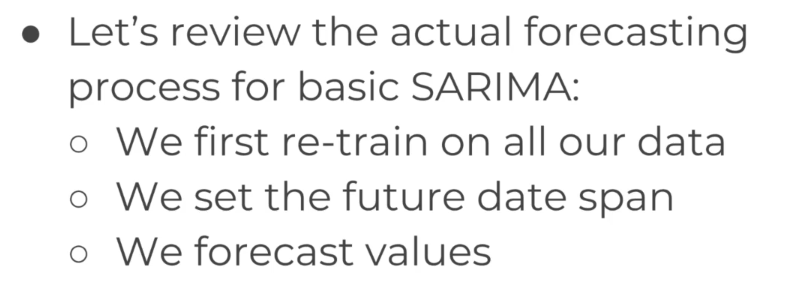

 <img 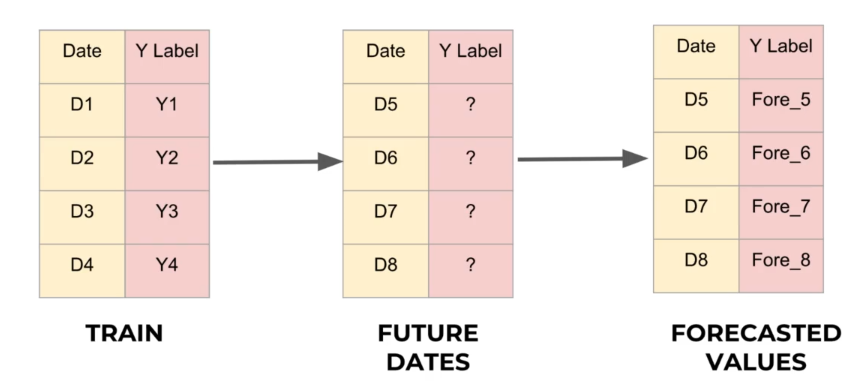

<img 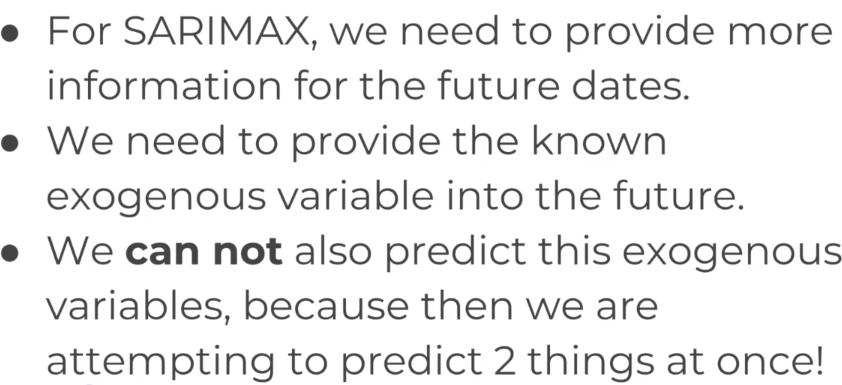

<img 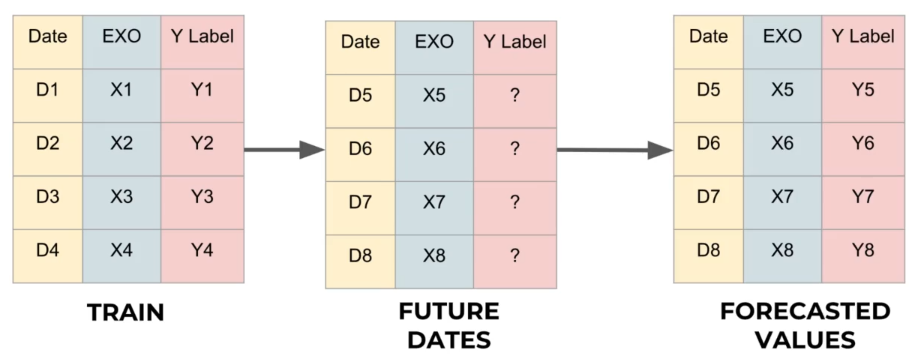

#### exploring with statsmodel

In [64]:
df1[['holiday']]

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2017-04-18,0
2017-04-19,0
2017-04-20,0


while passing exogenous parameter we need to get that field into dataframe

In [65]:
auto_arima(df1['total'],exogenous = df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2351.059
Date:                             Fri, 07 Jan 2022   AIC                           4714.117
Time:                                     15:41:17   BIC                           4739.135
Sample:                                 01-01-2016   HQIC                          4723.953
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.9737      2.901      5.851      0.000      11.288      22.660
holiday       47.9310      4.335     11.056      0.000      39.434      56.428
ar.L1          0.1412      0.046      3.092      0.002       0.052       0.231
ar.S.L7        0.8546      0.024     36.309      0.000       0.809       0.901
ma.S.L7       -0.4171      0.059     -7.052      0.000      -0.533      -0.301
sigma2      1043.7246     71.382     14.622      0.000     903.818    1183.631
===================================================================================
Ljung-Box (Q):                       96.20   Jarque-Bera (JB):                 7.73
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.90   Skew:                             0.30
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
## for exogenous model we got new values for pdq as shown above

## Train our Sarimax model

In [68]:
model = SARIMAX(train['total'],exogenous =train[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [69]:
result = model.fit()

In [70]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2155.511
Date:                             Fri, 07 Jan 2022   AIC                           4319.023
Time:                                     15:44:15   BIC                           4335.333
Sample:                                 01-01-2016   HQIC                          4325.460
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2194      0.043      5.066      0.000       0.135       0.304
ar.S.L7        0.9999      0.000   8033.739      0.000       1.000       1.000
ma.S.L7       -0.9405      0.023    -40.035      0.000      -0.987      -0.894
sigma2      1068.8325     54.343     19.668      0.000     962.323    1175.342
===================================================================================
Ljung-Box (Q):                       30.74   Jarque-Bera (JB):               106.77
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.77
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
start = len(train)
end = len(train) +len(test)-1

In [72]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exog')

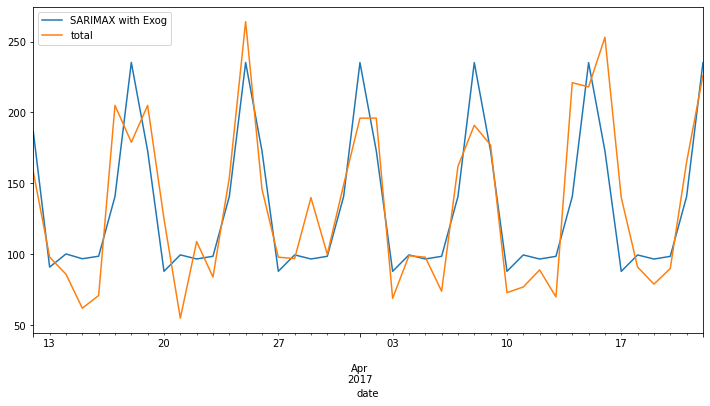

In [74]:
predictions.plot(figsize=(12,6),legend=True)
test['total'].plot(legend=True)

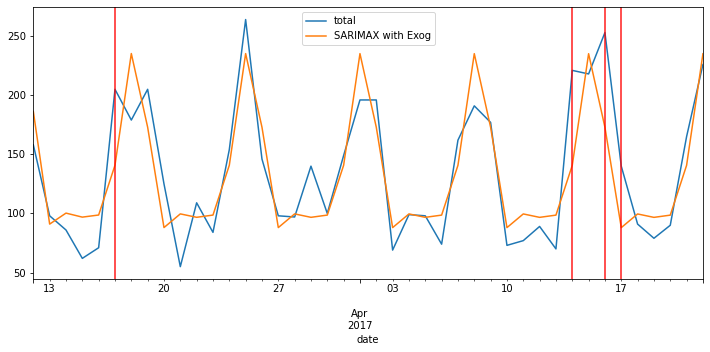

In [75]:
ax = test['total'].plot(legend=True,figsize=(12,5))
predictions.plot(legend= True)

#marking actual holidays on plot to get better visualizatoin of forecast

for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='red',alpha=0.9)

In [76]:
rmse(test['total'],predictions)

31.96933083775065

# forecasting into future

Running sarimax model

In [77]:
model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [78]:
results = model.fit()

In [79]:
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [80]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [83]:
df.iloc[477:]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN


In [84]:
exog_forecast = df[478:][['holiday']]

In [85]:
forecast = results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('Final SARIMAX Forecast')

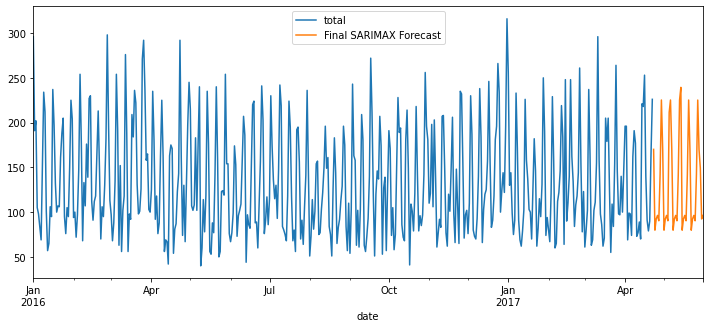

In [86]:
df1['total'].plot(figsize=(12,5),legend=True)
forecast.plot(legend = True)

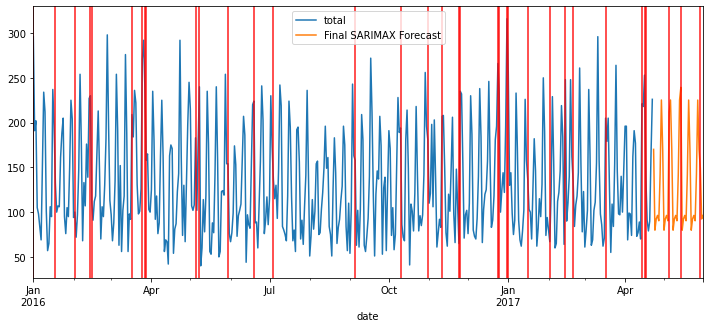

In [87]:
ax = df1['total'].plot(figsize=(12,5),legend=True)
forecast.plot(legend = True)

for x in df.query('holiday==1').index:
    ax.axvline(x=x,color='red',alpha=0.9)

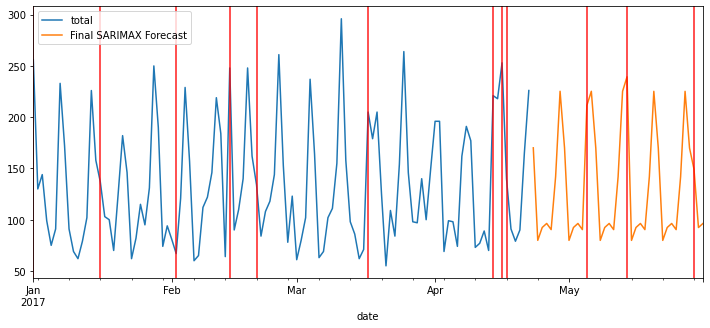

In [88]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(12,5),legend=True)
forecast.plot(legend = True)

for x in df.query('holiday==1').index:
    ax.axvline(x=x,color='red',alpha=0.9)